In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [39]:
# Read dataset
pdata = pd.read_csv("bank.csv")
pdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
pdata.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [41]:
# Drop the columns which are unique for all users
pdata = pdata.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
pdata.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [43]:
# Convert categorical variables
pdata = pd.get_dummies(pdata, columns=['Geography'])
pdata = pd.get_dummies(pdata, columns=['Gender'])
pdata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [44]:
# Distinguish the features and target variable
X =  pdata.drop(['Exited'], axis=1)
Y = pdata["Exited"]


In [45]:
# Normalize the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

X_train = preprocessing.normalize(X_train)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [46]:
# Initialize & build the model
model_classifier = Sequential()

# Add 2 hidden layers
model_classifier.add(Dense(16 ,activation='relu',input_dim = 13))
model_classifier.add(Dense(16,activation='relu'))

# Add output layer
model_classifier.add(Dense(1, activation='sigmoid'))

In [12]:
model_classifier.compile(optimizer='sgd', loss='binary_crossentropy',  metrics = ['accuracy'])
model_classifier.summary()

# model is trained over 100 epochs
model_classifier.fit(X_train,Y_train,epochs=100,batch_size=10)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5194 - accuracy: 0.7955
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5031 - accuracy: 0.7968
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5020 - accuracy: 0.7968
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5015 -

In [36]:
Y_pred = model_classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

In [37]:
X_test = preprocessing.normalize(X_test)
results = model_classifier.evaluate(X_test, Y_test.values)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [15]:
print(model_classifier.metrics_names)
print(results)  

['loss', 'accuracy']
[0.498396635055542, 0.7944999933242798]


In [16]:
# Confusion Matrix
Y_pred_cls = model_classifier.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model: '+ str(model_classifier.evaluate(X_test,Y_test.values)[1]))
print('Recall_score: ' + str(recall_score(Y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(Y_test.values,Y_pred_cls)))
confusion_matrix(Y_test.values, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 933us/step - loss: 0.4984 - accuracy: 0.7945
Accuracy Model: 0.7944999933242798
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[1589,    0],
       [ 411,    0]])

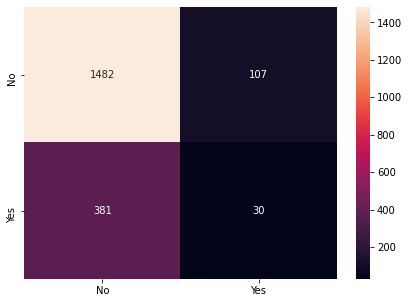

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [82]:
new_model_classifier = Sequential()
new_model_classifier.add(Dense(16, activation = 'relu', input_dim = 13))
new_model_classifier.add(Dense(16, activation = 'relu'))
new_model_classifier.add(Dense(1, activation = 'sigmoid'))
new_model_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
new_model_classifier.summary()

# model is trained over 100 epochs
new_model_classifier.fit(X_train,Y_train,epochs=100,batch_size=10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5108 - accuracy: 0.7940
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4903 - accuracy: 0.7968
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4853 - accuracy: 0.7965
Epoch 4/100
800/800 [==============================] - 1s 984us/step - loss: 0.4800

In [83]:
new_Y_pred = new_model_classifier.predict(X_test)
new_Y_pred = (new_Y_pred > 0.5)

In [84]:
new_results = new_model_classifier.evaluate(X_test, Y_test.values)
print(new_model_classifier.metrics_names)
print(new_results)  

63/63 [==============================] - 0s 1ms/step - loss: 65666.3672 - accuracy: 0.7970
['loss', 'accuracy']
[65666.3671875, 0.796999990940094]


In [88]:
# Confusion Matrix
new_Y_pred_cls = new_model_classifier.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Improved Model: '+ str(new_model_classifier.evaluate(X_test,Y_test.values)[1]))
print('Recall_score: ' + str(recall_score(Y_test.values,new_Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Y_test.values, new_Y_pred_cls)))
print('F-score: ' + str(f1_score(Y_test.values,new_Y_pred_cls)))
confusion_matrix(Y_test.values, new_Y_pred_cls)

63/63 [==============================] - 0s 956us/step - loss: 65666.3672 - accuracy: 0.7970
Accuracy Improved Model: 0.796999990940094
Recall_score: 0.0340632603406326
Precision_score: 0.6086956521739131
F-score: 0.06451612903225808


array([[1580,    9],
       [ 397,   14]])

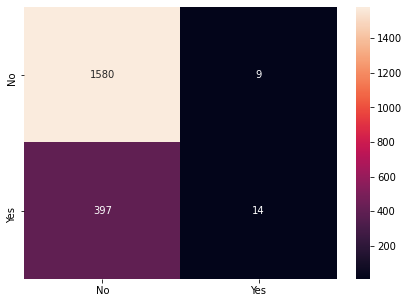

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, new_Y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Base on the info above, the diffrent between original model (model_classifier) and improved model (new_model_classifier) is just the optimizer changed from sgd to adam ####